In [1]:
import os
import zipfile

In [2]:
os.getcwd()

'/home/jovyan/08-deep-learning'

In [3]:
!ls

clothing-dataset-small-master	   notebook.ipynb
clothing-dataset-small-master.zip


In [4]:
# Get the current working directory
current_directory = os.getcwd()

# Filename to be joined with the current directory
zip_file_path = 'clothing-dataset-small-master.zip'

# Join the current directory path with the filename
extracted_folder_path = os.path.join(current_directory, zip_file_path)

# Display the full path
print("extracted_folder_path:", extracted_folder_path)

# Check if the extraction directory exists, if not, create it
if not os.path.exists(extracted_folder_path):
    os.makedirs(extracted_folder_path)

# Open the .zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the .zip file into the specified directory
    zip_ref.extractall()

print("Extraction complete.")

extracted_folder_path: /home/jovyan/08-deep-learning/clothing-dataset-small-master.zip
Extraction complete.


In [5]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [6]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import tensorflow as tf
from tensorflow import keras

2023-11-18 16:08:36.529111: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
from tensorflow.keras.preprocessing.image import load_img

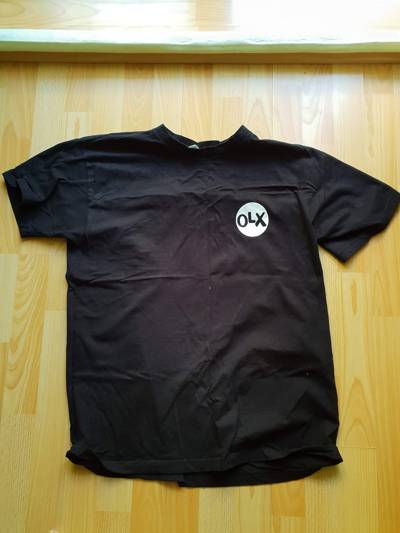

In [10]:
path = 'clothing-dataset-small-master/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = os.path.join(current_directory, path, name)
# fullname = f'{path}/{name}'
load_img(fullname)

In [11]:
img = load_img(fullname, target_size=(299, 299))

In [12]:
x = np.array(img)
x.shape

(299, 299, 3)

In [13]:
np.array(img)

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [14]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [15]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-18 16:08:42.995584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-18 16:08:43.002275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-18 16:08:43.002896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-18 16:08:43.003900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [16]:
X = np.array([x])

In [17]:
X.shape

(1, 299, 299, 3)

In [18]:
X = preprocess_input(X)

In [19]:
pred = model.predict(X)

2023-11-18 16:08:46.734096: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-18 16:08:47.407116: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-18 16:08:47.407606: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-18 16:08:47.407644: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-18 16:08:47.408236: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-18 16:08:47.408346: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [20]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [32]:
!ls -lah clothing-dataset-small-master/train

total 268K
drwxrwsr-x 12 jovyan jovyan 4.0K Nov 16 19:35 .
drwxrwsr-x  5 jovyan jovyan 4.0K Nov 16 19:35 ..
drwxrwsr-x  2 jovyan jovyan  20K Nov 16 19:35 dress
drwxrwsr-x  2 jovyan jovyan  12K Nov 16 19:35 hat
drwxrwsr-x  2 jovyan jovyan  36K Nov 16 19:35 longsleeve
drwxrwsr-x  2 jovyan jovyan  16K Nov 16 19:35 outwear
drwxrwsr-x  2 jovyan jovyan  36K Nov 16 19:35 pants
drwxrwsr-x  2 jovyan jovyan  20K Nov 16 19:35 shirt
drwxrwsr-x  2 jovyan jovyan  20K Nov 16 19:35 shoes
drwxrwsr-x  2 jovyan jovyan  20K Nov 16 19:35 shorts
drwxrwsr-x  2 jovyan jovyan  12K Nov 16 19:35 skirt
drwxrwsr-x  2 jovyan jovyan  68K Nov 16 19:35 t-shirt


In [33]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [35]:
next(train_ds)

(array([[[[-0.04313725, -0.04313725, -0.10588235],
          [-0.01176471, -0.01176471, -0.0745098 ],
          [ 0.01176476,  0.01176476, -0.05098039],
          ...,
          [ 0.41176474,  0.41176474,  0.39607847],
          [ 0.4039216 ,  0.4039216 ,  0.38823533],
          [ 0.39607847,  0.39607847,  0.3803922 ]],
 
         [[-0.02745098, -0.02745098, -0.09019607],
          [-0.01176471, -0.01176471, -0.0745098 ],
          [-0.01176471, -0.01176471, -0.0745098 ],
          ...,
          [ 0.41176474,  0.41176474,  0.39607847],
          [ 0.4039216 ,  0.4039216 ,  0.38823533],
          [ 0.39607847,  0.39607847,  0.3803922 ]],
 
         [[-0.00392157, -0.00392157, -0.06666666],
          [ 0.00392163,  0.00392163, -0.05882353],
          [-0.01176471, -0.01176471, -0.0745098 ],
          ...,
          [ 0.4039216 ,  0.4039216 ,  0.38823533],
          [ 0.4039216 ,  0.4039216 ,  0.38823533],
          [ 0.38823533,  0.38823533,  0.37254906]],
 
         ...,
 
         [[-

In [36]:
X, y = next(train_ds)

In [37]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [39]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 2s 0us/step


In [40]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [41]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 17s 147ms/step - loss: 1.1995 - accuracy: 0.6789 - val_loss: 0.7534 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.5109 - accuracy: 0.8393 - val_loss: 0.8918 - val_accuracy: 0.7771
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3941 - accuracy: 0.8657 - val_loss: 0.8618 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.2471 - accuracy: 0.9143 - val_loss: 0.9059 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 12s 125ms/step - loss: 0.2022 - accuracy: 0.9293 - val_loss: 0.8931 - val_accuracy: 0.7859
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.1042 - accuracy: 0.9596 - val_loss: 0.8636 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 12s 125ms/step - loss: 0.0859 - accuracy: 0.9716 - val_loss: 0.8663 - val_accuracy: 0.8240

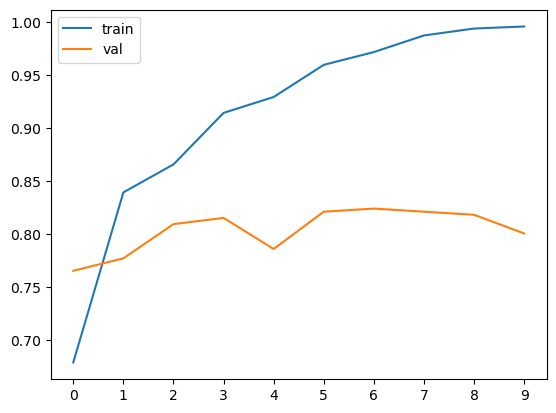

In [43]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [44]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [46]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 128ms/step - loss: 1.8606 - accuracy: 0.3866 - val_loss: 1.5614 - val_accuracy: 0.4927
Epoch 2/10
96/96 [==============================] - 12s 121ms/step - loss: 1.3531 - accuracy: 0.5740 - val_loss: 1.2317 - val_accuracy: 0.6188
Epoch 3/10
96/96 [==============================] - 12s 120ms/step - loss: 1.1174 - accuracy: 0.6503 - val_loss: 1.0527 - val_accuracy: 0.6657
Epoch 4/10
96/96 [==============================] - 12s 120ms/step - loss: 0.9803 - accuracy: 0.6992 - val_loss: 0.9502 - val_accuracy: 0.7067
Epoch 5/10
96/96 [==============================] - 12s 120ms/step - loss: 0.8898 - accuracy: 0.7243 - val_loss: 0.8731 - val_accuracy: 0.7273
Epoch 6/10
96/96 [==============================] - 12s 121ms/step - loss: 0.8238 - accuracy: 0.7422 - val_loss: 0.8183 - val_accuracy: 0.7566
Epoch 7/10
96/96 [==============================] - 12s 120ms/step - loss: 0.7743 - accuracy: 0.7555 - val_loss: 0.7832 - val_accuracy:

In [ ]:
# del scores[0.1]
# del scores[0.0001]

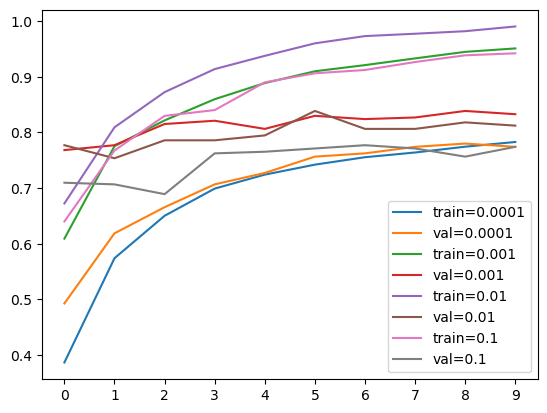

In [47]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [48]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [51]:
model.save_weights('model_v1.h5', save_format='h5')

In [52]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [53]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.0904 - accuracy: 0.6327 - val_loss: 0.7102 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.6261 - accuracy: 0.7862 - val_loss: 0.6305 - val_accuracy: 0.8152
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5119 - accuracy: 0.8341 - val_loss: 0.5798 - val_accuracy: 0.8387
Epoch 4/10
96/96 [==============================] - 12s 120ms/step - loss: 0.4278 - accuracy: 0.8644 - val_loss: 0.5719 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3707 - accuracy: 0.8843 - val_loss: 0.5361 - val_accuracy: 0.8416
Epoch 6/10
96/96 [==============================] - 12s 121ms/step - loss: 0.3234 - accuracy: 0.9081 - val_loss: 0.5342 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 12s 120ms/step - loss: 0.2893 - accuracy: 0.9247 - val_loss: 0.5278 - val_accuracy: 0.8328

In [54]:
!ls

clothing-dataset-small-master	   xception_v1_01_0.780.h5
clothing-dataset-small-master.zip  xception_v1_02_0.815.h5
model_v1.h5			   xception_v1_03_0.839.h5
notebook.ipynb			   xception_v1_05_0.842.h5


## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [55]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [56]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size
    )
    
    history = model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds
    )
    
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 14s 128ms/step - loss: 1.3631 - accuracy: 0.5469 - val_loss: 0.8850 - val_accuracy: 0.6979
Epoch 2/10
96/96 [==============================] - 12s 121ms/step - loss: 0.7867 - accuracy: 0.7389 - val_loss: 0.6769 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 12s 120ms/step - loss: 0.6073 - accuracy: 0.7999 - val_loss: 0.6267 - val_accuracy: 0.7830
Epoch 4/10
96/96 [==============================] - 12s 120ms/step - loss: 0.5144 - accuracy: 0.8299 - val_loss: 0.5903 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4322 - accuracy: 0.8572 - val_loss: 0.5574 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 12s 121ms/step - loss: 0.3630 - accuracy: 0.8885 - val_loss: 0.5591 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 12s 121ms/step - loss: 0.3070 - accuracy: 0.9110 - val_loss: 0.5345 - val_accuracy: 0.8

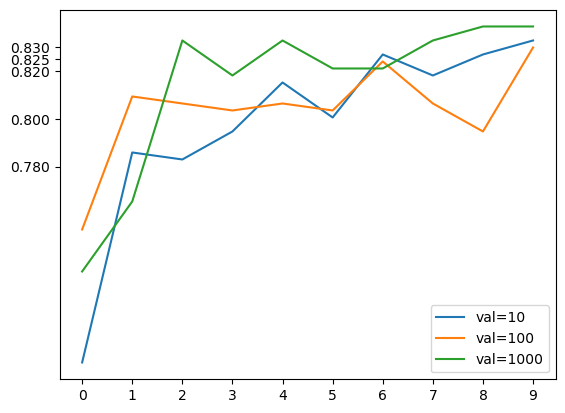

In [57]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [58]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [59]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 14s 129ms/step - loss: 0.9661 - accuracy: 0.6675 - val_loss: 0.6683 - val_accuracy: 0.7889
Epoch 2/30
96/96 [==============================] - 12s 120ms/step - loss: 0.5178 - accuracy: 0.8181 - val_loss: 0.6315 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 12s 120ms/step - loss: 0.3478 - accuracy: 0.8804 - val_loss: 0.5225 - val_accuracy: 0.8270
Epoch 4/30
96/96 [==============================] - 12s 122ms/step - loss: 0.2715 - accuracy: 0.9130 - val_loss: 0.6419 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 12s 121ms/step - loss: 0.1980 - accuracy: 0.9436 - val_loss: 0.5718 - val_accuracy: 0.8006
Epoch 6/30
96/96 [==============================] - 12s 121ms/step - loss: 0.1316 - accuracy: 0.9707 - val_loss: 0.5566 - val_accuracy: 0.8211
Epoch 7/30
96/96 [==============================] - 12s 121ms/step - loss: 0.0915 - accuracy: 0.9866 - val_loss: 0.6175 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 12s 120ms/step - loss: 0.0137 - accuracy: 0.9977 - val_loss: 0.7656 - val_accuracy: 0.8358
Epoch 29/30
96/96 [==============================] - 11s 119ms/step - loss: 0.0177 - accuracy: 0.9974 - val_loss: 0.8533 - val_accuracy: 0.8152
Epoch 30/30
96/96 [==============================] - 12s 120ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 0.8623 - val_accuracy: 0.8240


0.5
Epoch 1/30
96/96 [==============================] - 15s 128ms/step - loss: 1.2758 - accuracy: 0.5711 - val_loss: 0.7446 - val_accuracy: 0.7595
Epoch 2/30
96/96 [==============================] - 12s 120ms/step - loss: 0.8217 - accuracy: 0.7141 - val_loss: 0.6313 - val_accuracy: 0.8123
Epoch 3/30
96/96 [==============================] - 12s 120ms/step - loss: 0.6629 - accuracy: 0.7634 - val_loss: 0.6328 - val_accuracy: 0.7801
Epoch 4/30
96/96 [==============================] - 12s 120ms/step - loss: 0.5848 - accuracy: 0.7920 - val_loss: 0.5580 - val_accurac

Epoch 25/30
96/96 [==============================] - 12s 121ms/step - loss: 0.7085 - accuracy: 0.7259 - val_loss: 0.6176 - val_accuracy: 0.7977
Epoch 26/30
96/96 [==============================] - 12s 119ms/step - loss: 0.6753 - accuracy: 0.7399 - val_loss: 0.6072 - val_accuracy: 0.7947
Epoch 27/30
96/96 [==============================] - 12s 121ms/step - loss: 0.6783 - accuracy: 0.7441 - val_loss: 0.5763 - val_accuracy: 0.8152
Epoch 28/30
96/96 [==============================] - 12s 120ms/step - loss: 0.6568 - accuracy: 0.7464 - val_loss: 0.5521 - val_accuracy: 0.8094
Epoch 29/30
96/96 [==============================] - 12s 121ms/step - loss: 0.6810 - accuracy: 0.7308 - val_loss: 0.5805 - val_accuracy: 0.8123
Epoch 30/30
96/96 [==============================] - 12s 120ms/step - loss: 0.6671 - accuracy: 0.7415 - val_loss: 0.5845 - val_accuracy: 0.8035




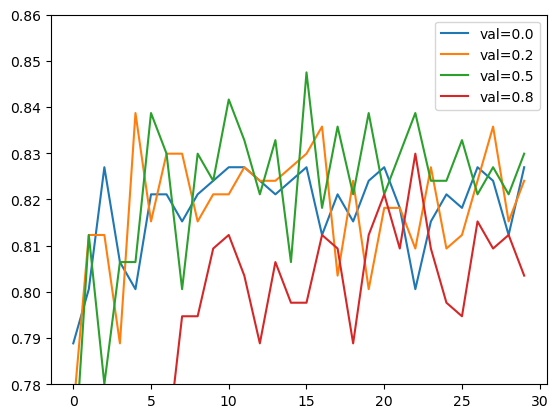

In [60]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

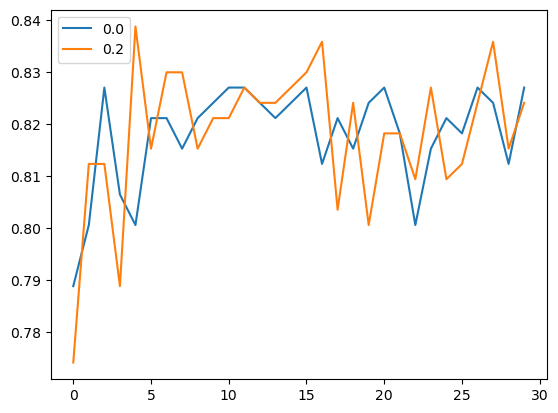

In [61]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [65]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [66]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 15s 130ms/step - loss: 1.1006 - accuracy: 0.6418 - val_loss: 0.6925 - val_accuracy: 0.7771
Epoch 2/50
96/96 [==============================] - 12s 120ms/step - loss: 0.6120 - accuracy: 0.7934 - val_loss: 0.6069 - val_accuracy: 0.8240
Epoch 3/50
96/96 [==============================] - 12s 120ms/step - loss: 0.4550 - accuracy: 0.8458 - val_loss: 0.6316 - val_accuracy: 0.7918
Epoch 4/50
96/96 [==============================] - 12s 121ms/step - loss: 0.3642 - accuracy: 0.8742 - val_loss: 0.5716 - val_accuracy: 0.8065
Epoch 5/50
96/96 [==============================] - 12s 120ms/step - loss: 0.2765 - accuracy: 0.9113 - val_loss: 0.5428 - val_accuracy: 0.8182
Epoch 6/50
96/96 [==============================] - 12s 120ms/step - loss: 0.2203 - accuracy: 0.9316 - val_loss: 0.6024 - val_accuracy: 0.8152
Epoch 7/50
96/96 [==============================] - 11s 119ms/step - loss: 0.1755 - accuracy: 0.9472 - val_loss: 0.5770 - val_accuracy: 0.8211

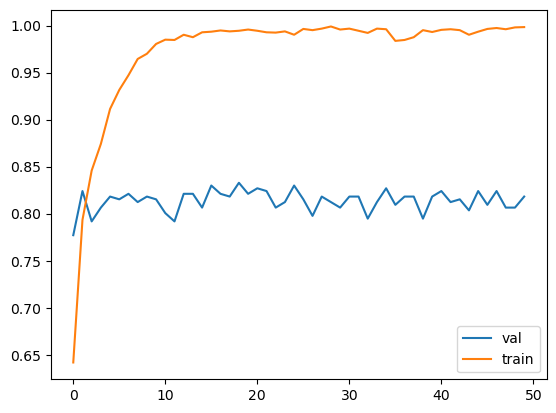

In [67]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [68]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [69]:
input_size = 299

In [70]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small-master/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [71]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [72]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 70s 696ms/step - loss: 1.0351 - accuracy: 0.6711 - val_loss: 0.5880 - val_accuracy: 0.8065
Epoch 2/50
96/96 [==============================] - 65s 671ms/step - loss: 0.5336 - accuracy: 0.8266 - val_loss: 0.4518 - val_accuracy: 0.8622
Epoch 3/50
96/96 [==============================] - 64s 666ms/step - loss: 0.4461 - accuracy: 0.8449 - val_loss: 0.4109 - val_accuracy: 0.8563
Epoch 4/50
96/96 [==============================] - 64s 668ms/step - loss: 0.3903 - accuracy: 0.8683 - val_loss: 0.3795 - val_accuracy: 0.8622
Epoch 5/50
96/96 [==============================] - 65s 673ms/step - loss: 0.3635 - accuracy: 0.8787 - val_loss: 0.3596 - val_accuracy: 0.8827
Epoch 6/50
96/96 [==============================] - 64s 667ms/step - loss: 0.3318 - accuracy: 0.8944 - val_loss: 0.3816 - val_accuracy: 0.8739
Epoch 7/50
96/96 [==============================] - 64s 669ms/step - loss: 0.3073 - accuracy: 0.8993 - val_loss: 0.4135 - val_accuracy: 0.8710

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [75]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small-master/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [76]:
model = keras.models.load_model('xception_v4_1_47_0.903.h5')

In [77]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 271ms/step - loss: 0.2841 - accuracy: 0.9113


[0.28407230973243713, 0.9112903475761414]

In [78]:
path = 'clothing-dataset-small-master/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [79]:
img = load_img(path, target_size=(299, 299))

In [80]:
import numpy as np

In [81]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [82]:
X = preprocess_input(X)

In [83]:
pred = model.predict(X)

1/1 [==============================] - 1s 601ms/step


In [84]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [85]:
dict(zip(classes, pred[0]))

{'dress': -5.0977373,
 'hat': -7.0144086,
 'longsleeve': -3.42318,
 'outwear': -6.176218,
 'pants': 11.643806,
 'shirt': -5.5926347,
 'shoes': -7.5980396,
 'shorts': 1.8856014,
 'skirt': -8.444532,
 't-shirt': -6.80098}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

